In [1]:
import tensorflow as tf 
import tensorflow.keras as keras

**Dataset Loading**

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/maste/Downloads/waste_management_system/waste_management/compostnet-dataset-resized",
    image_size=(256, 256),
    batch_size=32,
)

Found 2751 files belonging to 7 classes.


**Model Building**

In [6]:
class_label_list  = dataset.class_names

In [7]:
class_label_list

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [8]:
cnn_model = keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

C:\Users\maste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compiling**

In [9]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**Model Fitting**

In [10]:
cnn_model.fit(
    dataset,
    epochs=10,
    steps_per_epoch=len(dataset),
    validation_steps=0.2 * len(dataset),
    validation_data=None,
    verbose=1
)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.2224 - loss: 2.5716
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.3906 - loss: 1.5226
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.5503 - loss: 1.2040
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.6329 - loss: 0.9980
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.7311 - loss: 0.7364
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.8243 - loss: 0.5370
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.8649 - loss: 0.3931
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9196 - loss: 0.2478
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9464 - loss: 0.1682
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9429 - loss: 0.1846


In [11]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,519,639 (169.83 MB)

 Trainable params: 14,839,879 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,679,760 (113.22 MB)

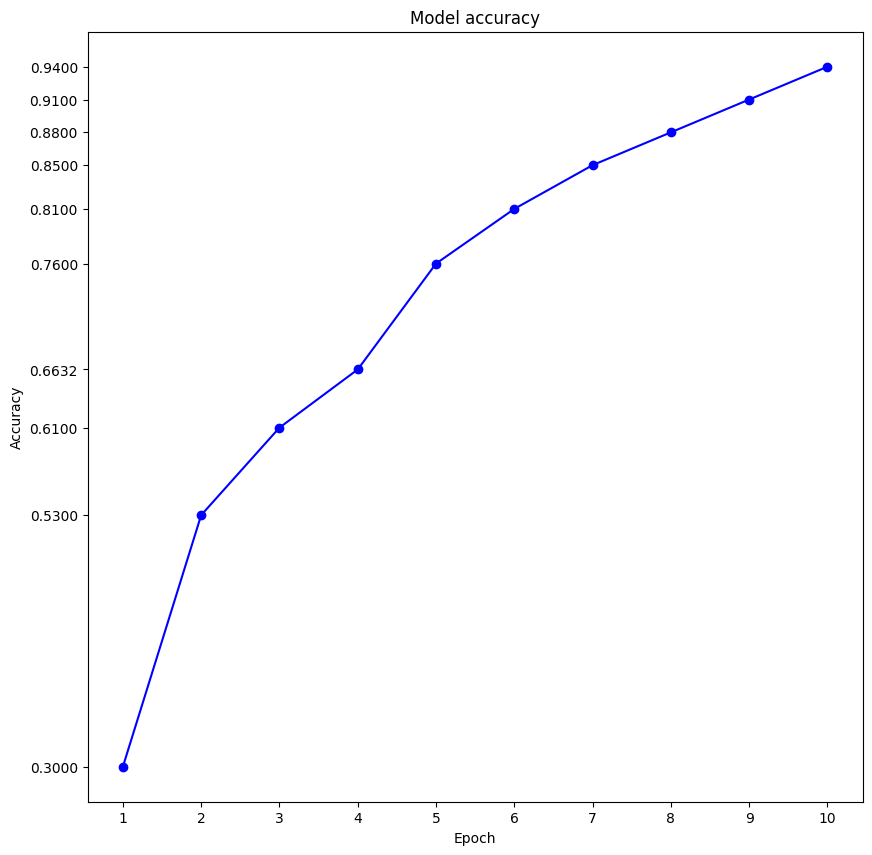

In [30]:
import matplotlib.pyplot as plt


accuracy_list = [0.3 , 0.53 , 0.61, 0.6632 , 0.76 , 0.81 , 0.85,0.88,0.91,0.94]
epochs_list = [1 , 2 , 3 , 4 , 5 , 6 , 7,8,9,10]

plt.figure(figsize=(10, 10))
plt.plot(epochs_list, accuracy_list, marker='o', color='blue', label='Accuracy',scalex=True , scaley=True) 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(epochs_list)
plt.yticks(accuracy_list)
plt.show()

**Saving the model**

In [12]:
cnn_model.save('waste_model_3.h5',save_format='tf')

In [4]:
import tensorflow as tf

In [32]:
cnn_model = tf.keras.models.load_model("C:/Users/DELL/Desktop/R/project/waste-management-system/waste_management/models/waste_model_2.h5")

Found 2527 files belonging to 6 classes.


In [14]:
import matplotlib.pyplot as plt

In [15]:
class_label_list = ['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


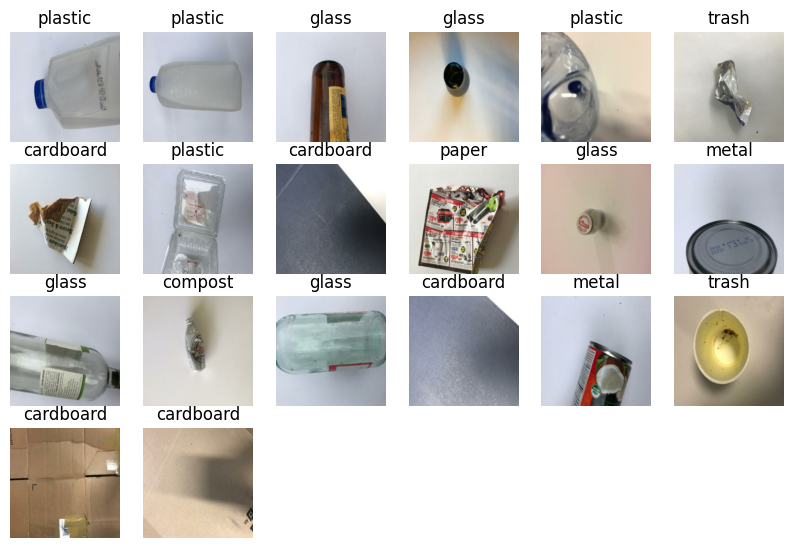

In [16]:
for image_batch , labels_batch in dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(20):
    
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        # plt.title(int(labels_batch[i]))
        plt.title(class_label_list[cnn_model.predict(image_batch)[i].argmax()])
        plt.axis("off")